# 1 Mechine Learning Teknik algoritma SVM (Suport Vektor Mechine)

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

#Traning
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

### import data

In [2]:
df = pd.read_csv("../data/carprice.csv", index_col="ID")
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


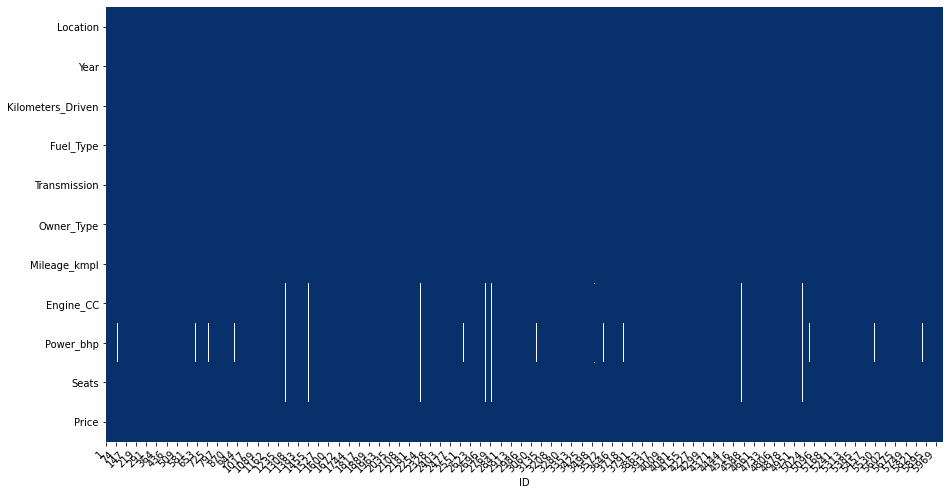

In [3]:
#buang data tidak berguna
df.drop(columns="Name", inplace=True)
plot_missing_value(df)

### Split Data

In [4]:
X = df.drop(columns=["Price"])
y = df["Price"]

#karna kita prediksi regresi bukan clasifikasi maka data splitnya suffle split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4762, 10), (1191, 10), (4762,), (1191,))

### Training

In [5]:
X_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats
ID,,,,,,,,,,
4380,Coimbatore,2016,60913,Petrol,Manual,First,20.73,1373.0,91.1,5.0
2676,Kochi,2017,40459,Diesel,Manual,First,19.67,1582.0,126.2,5.0
647,Jaipur,2004,200000,Petrol,Manual,First,0.00,1086.0,NaN,5.0
5966,Hyderabad,2018,1048,Petrol,Manual,First,18.90,998.0,67.1,5.0
2198,Ahmedabad,2013,96000,Diesel,Manual,Second,23.50,1498.0,90.0,5.0


In [6]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(scaling="robust"), ["Year","Kilometers_Driven", "Mileage_kmpl","Engine_CC","Power_bhp","Seats"]),
    ("categoric",cat_pipe(encoder="onehot"), ["Location","Fuel_Type","Transmission","Owner_Type"])
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScale

{'algo__C': 10.0, 'algo__gamma': 0.1}
0.8692907569381978 0.8314246832596818 0.8365068850275925


## Polynominal fetures

In [7]:
gsp.svm_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

- numeric untuk jumlah pemangkatan

- interaksi only menjelaskan tentang polyniminal mw memakai pemangkatan atau tidak
  klw tidak pakai pemangkatan(future crossing) contoh x1, x2, x1 x2

- gamma untuk seberapa detail oriented

- C penalty atau toleransi

In [9]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(poly=2,scaling="robust"), ["Year","Kilometers_Driven", "Mileage_kmpl","Engine_CC","Power_bhp","Seats"]),
    ("categoric",cat_pipe(encoder="onehot"), ["Location","Fuel_Type","Transmission","Owner_Type"])
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_poly_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScale

{'algo__C': 10.0, 'algo__gamma': 0.1, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.8692907569381978 0.8314246832596819 0.8365068850275925


# 2 SVC support vektor clasification

In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

#Traning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

### Import Data

In [11]:
df = pd.read_csv("../data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


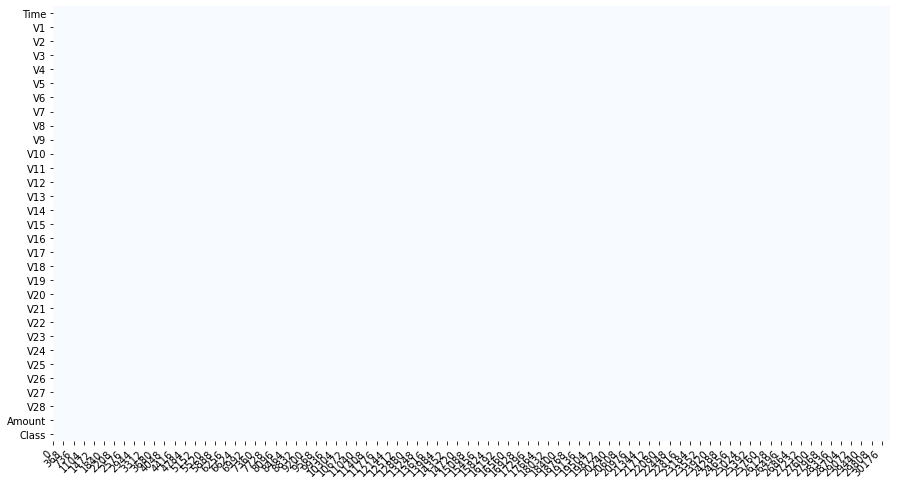

In [12]:
plot_missing_value(df)

### Data Split

In [13]:
X = df.drop(columns=["Class"])
y = df["Class"]

#karna kita pclasifikasi maka data splitnya suffle split stratify terhadap target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24393, 30), (6099, 30), (24393,), (6099,))

### Training

In [14]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
12736,22445.0,0.539512,1.085473,0.576746,2.195413,0.532367,0.158459,0.235790,-1.070067,0.202736,...,-0.163299,0.629503,-0.425354,-0.101692,-0.496465,0.731752,0.014507,0.086961,0.163021,35.11
30039,17187.0,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,0.860044,...,-0.217358,-0.423554,-0.800852,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,3.79
22199,32148.0,-1.652498,-0.208039,3.757584,3.449809,-0.319969,1.079280,-0.580438,0.099527,0.952466,...,0.204995,-0.170971,0.977258,0.216107,0.467739,0.414988,0.526917,0.252137,-0.293213,6.85
1282,993.0,-0.466889,0.719352,1.092650,-0.884827,0.708279,0.046268,0.595864,0.208502,-0.382578,...,-0.179254,-0.213836,-0.823791,-0.193135,-1.098534,-0.235114,-0.016216,0.041684,0.096239,1.98
6403,7602.0,-4.516626,4.366391,-0.282225,0.641568,-0.694287,1.493967,-2.719045,-7.427753,2.301325,...,-0.838170,7.252584,-2.858266,0.930979,-0.668059,0.258568,-0.339574,0.719033,-0.032462,2.00


In [15]:
X_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [16]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(scaling='standard'), X_train.columns)
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", SVC(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScale

{'algo__C': 1000.0, 'algo__gamma': 0.001}
0.999385069487148 0.9996720773897361 0.9986471528717256


## Kalau hasil 99% Ingat harus curiga
 - apakah terjadi data lekage
 - apakah dataset imbalance
 - apakah problem nya sesuatu yang sederna
 
### akan tetapi padakasus ini datasetnya bersifat imbalance

In [17]:
print (df["Class"].value_counts())
print (30000/30492)

0    30000
1      492
Name: Class, dtype: int64
0.9838646202282566


## Akurasi tidak bisa dipakai pada dataset Imbalance
  sehingga pakailah `scoring = f1`

In [18]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(scaling='standard'), X_train.columns)
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", SVC(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, scoring="f1", n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScale

{'algo__C': 1000.0, 'algo__gamma': 0.001}
0.980595084087969 0.9896907216494846 0.9574909514939499


In [19]:
from jcopml.plot import plot_confusion_matrix

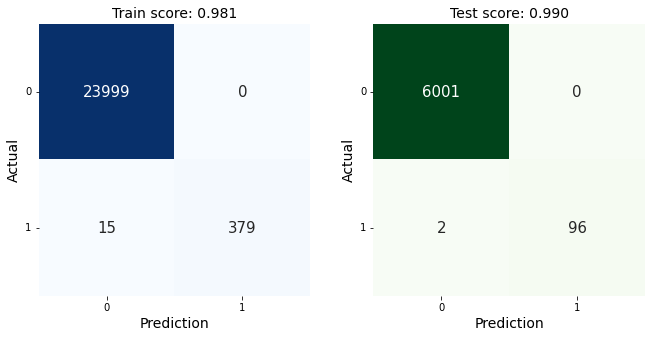

In [20]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

## Mencoba improve data pakai class weight

In [21]:
 [{0:x,1:1-x} for x in [0.05, 0.1, 0.025]]

[{0: 0.05, 1: 0.95}, {0: 0.1, 1: 0.9}, {0: 0.025, 1: 0.975}]

In [22]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(scaling='standard'), X_train.columns)
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", SVC(max_iter=500))
])

parameter = {
    'algo__gamma': np.logspace(-3, 3, 7),
    'algo__C': np.logspace(-3, 3, 7),
    'algo__class_weight': [{0:x,1:1-x} for x in [0.05, 0.1, 0.025]]
}

model = GridSearchCV(pipeline, parameter, cv=3, scoring="f1", n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 147 candidates, totalling 441 fits


/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/rizki/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScale

{'algo__C': 100.0, 'algo__class_weight': {0: 0.1, 1: 0.9}, 'algo__gamma': 0.01}
0.9923857868020305 0.9748743718592964 0.9606700001671838
